<a href="https://colab.research.google.com/github/SamLutz/Master-thesis/blob/main/test_master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Master Thesis  
Author : Samuel Lutz  
Date: SP 25

In [ ]:
!pip install netCDF4
!pip install xarray
!pip install pooch
!pip install windrose
import os
import numpy as np
import xarray as xr
from netCDF4 import Dataset
from datetime import datetime
import pooch
import netCDF4 as nc
import matplotlib.pyplot as plt
from windrose import WindroseAxes

Download data from Onedrive with Pooch & give names to files


In [ ]:
# List of OneDrive files with their URLs
files_urls_1 = [
    'https://unils-my.sharepoint.com/:f:/g/personal/samuel_lutz_unil_ch/Eh8nUEHeGCZCjtWw_x73f_4BifVWdtVadZBfJwPdFZawEA?download=1',
    'https://unils-my.sharepoint.com/:u:/g/personal/samuel_lutz_unil_ch/EdhDp63kVmxKnYOwZY9c__QBl6ApljIPHZDPrWSL3msYiA?download=1',
    'https://unils-my.sharepoint.com/:u:/g/personal/samuel_lutz_unil_ch/EZWsSdBQ8lhAuhOd6zj1VIoBNDvSfD-eDV7g-hwq2Aazdg?download=1',
]
files_urls_2 = [
    'https://unils-my.sharepoint.com/:u:/g/personal/samuel_lutz_unil_ch/ESfJx4dv55hHuA4L2bzb6LkBrHp8JyuSxq1-5oA2XqllvQ?download=1',
    'https://unils-my.sharepoint.com/:u:/g/personal/samuel_lutz_unil_ch/Eb6nAx8kQvRIttOz_TQQR9YBORSNw1VoxOgxia_uuM8gzQ?download=1',
    'https://unils-my.sharepoint.com/:u:/g/personal/samuel_lutz_unil_ch/EXtCNMxKKJRNpmQqto2Mu6QB9ZzwtUPoK_QT6K1j-ScPjA?download=1',
]
# Hashed file values (optional, use None if unknown)
hashes = [None] * (len(files_urls_1) + len(files_urls_2))  # Calculate total length

In [ ]:
file_names = ["Meteostation_08_12.nc", "Meteostation_08_19.nc", "Meteostation_08_26.nc", "Meteostation_10_07.nc","Meteostation_10_14.nc","Meteostation_10_21.nc"]
downloaded_files = []  # List for storing the paths of downloaded files

for url, name in zip(files_urls, file_names):
    file_path = pooch.retrieve(url, known_hash=None, fname=name)  # Save with the right name
    downloaded_files.append(file_path)

print("Fichiers téléchargés :", downloaded_files)

Fichiers téléchargés : ['/root/.cache/pooch/Meteostation_08_12.nc', '/root/.cache/pooch/Meteostation_08_19.nc', '/root/.cache/pooch/Meteostation_08_26.nc', '/root/.cache/pooch/Meteostation_10_07.nc', '/root/.cache/pooch/Meteostation_10_14.nc', '/root/.cache/pooch/Meteostation_10_21.nc']


In [ ]:
import xarray as xr

for file_path in downloaded_files:
    try:
        dataset = xr.open_dataset(file_path)
        print(f"Fichier : {file_path}")
        print("Variables disponibles :", list(dataset.variables))  # Using list for display
        all_variables.append(list(dataset.variables))  # Storing as list
    except Exception as e:
        print(f"Error opening {file_path}: {e}")

Error opening /root/.cache/pooch/Meteostation_08_12.nc: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'h5netcdf', 'scipy']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html
Fichier : /root/.cache/pooch/Meteostation_08_19.nc
Variables disponibles : ['time', 'Batt', 'Ptemp', 'AirTC', 'RH', 'Slrw', 'Slrm', 'WS', 'WindDir', 'Rain', 'BP', 'WindGust', 'time_qual', 'Batt_qual', 'Ptemp_qual', 'AirTC_qual', 'RH_qual', 'Slrw_qual', 'Slrm_qual', 'WS_qual', 'WindDir_qual', 'Rain_qual', 'BP_qual', 'WindGust_qual']
Error opening /root/.cache/pooch/Meteostation_08_19.nc: name 'all_variables' is not defined
Fichier : /root/.cache/pooch/Meteostation_08_26.nc
Variables disponibles : ['time', 'Batt', 'Ptemp', 'AirTC', 'RH', 'Slrw', 'Slrm', 'WS', 'WindDir', 'R

In [ ]:
# Load all files as a dataset
datasets = []
for file in downloaded_files:
    try:
        # Explicitly specify the engine as 'netcdf4'
        dataset = xr.open_dataset(file, engine='netcdf4')
        datasets.append(dataset)
    except Exception as e:
        print(f"Error opening {file}: {e}")

# Merge on a common dimension (e.g. ‘time’)
data = xr.concat(datasets, dim="time")

# Inspect the result
print(data)

# Save the merged result
data.to_netcdf("data_merged.nc")

Exception ignored in: <function CachingFileManager.__del__ at 0x7a098a37a840>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/xarray/backends/file_manager.py", line 250, in __del__
  File "/usr/local/lib/python3.11/dist-packages/xarray/backends/file_manager.py", line 234, in close
  File "src/netCDF4/_netCDF4.pyx", line 2669, in netCDF4._netCDF4.Dataset.close
  File "src/netCDF4/_netCDF4.pyx", line 2636, in netCDF4._netCDF4.Dataset._close
  File "src/netCDF4/_netCDF4.pyx", line 2164, in netCDF4._netCDF4._ensure_nc_success
RuntimeError: NetCDF: HDF error


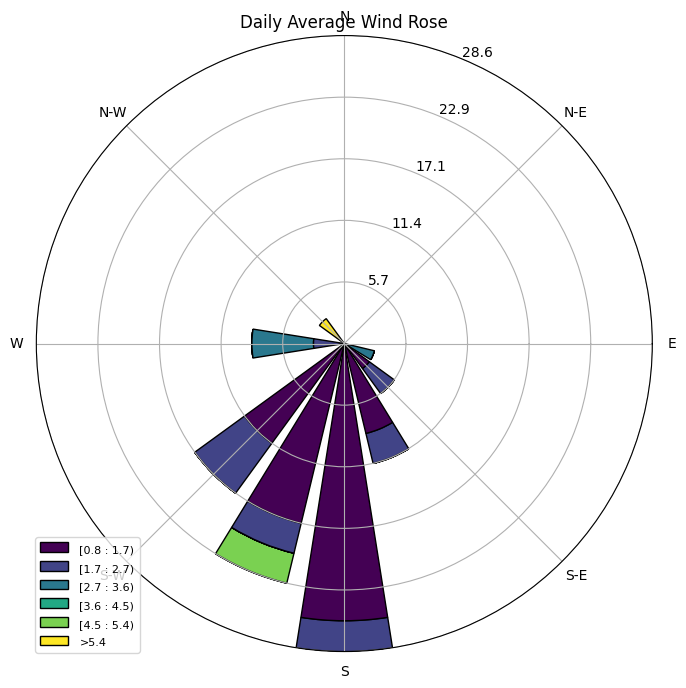

In [ ]:
# Load the merged dataset
file_path = "data_merged.nc"
ds = xr.open_dataset(file_path, engine="netcdf4")

# Convert time to pandas datetime index
ds["time"] = ds["time"].astype("datetime64[ns]")

# Group by day and calculate mean
daily_avg = ds.groupby("time.date").mean()

# Extract daily mean wind speed (WS) and direction (WindDir)
wind_speed = daily_avg["WS"].values
wind_direction = daily_avg["WindDir"].values

# Create wind rose plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="windrose")
ax.bar(wind_direction, wind_speed, normed=True, opening=0.8, edgecolor="black")

# Customize plot
ax.set_title("Daily Average Wind Rose")
ax.set_legend()
plt.show()